In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet


In [2]:
# Read data
myData = pd.read_csv("data.csv")
df = pd.DataFrame(data = myData)

In [3]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


<AxesSubplot:ylabel='Frequency'>

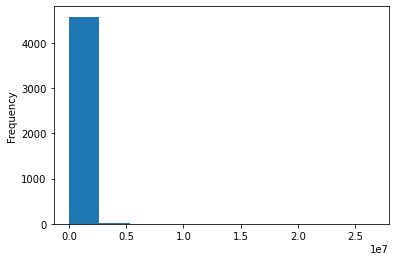

In [4]:
df['price'].plot(kind='hist')

In [5]:
df["price"].sort_values(axis=0, ascending=False)

4350    26590000.0
4346    12899000.0
2286     7062500.0
2654     4668000.0
2761     4489000.0
           ...    
4472           0.0
4567           0.0
4354           0.0
4454           0.0
4382           0.0
Name: price, Length: 4600, dtype: float64

In [6]:
df["sqft_lot"].sort_values(axis=0, ascending=False)

1078    1074218
2480     641203
3487     478288
375      435600
879      435600
         ...   
3247        747
4004        746
1913        704
315         681
3608        638
Name: sqft_lot, Length: 4600, dtype: int64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_lot'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqf

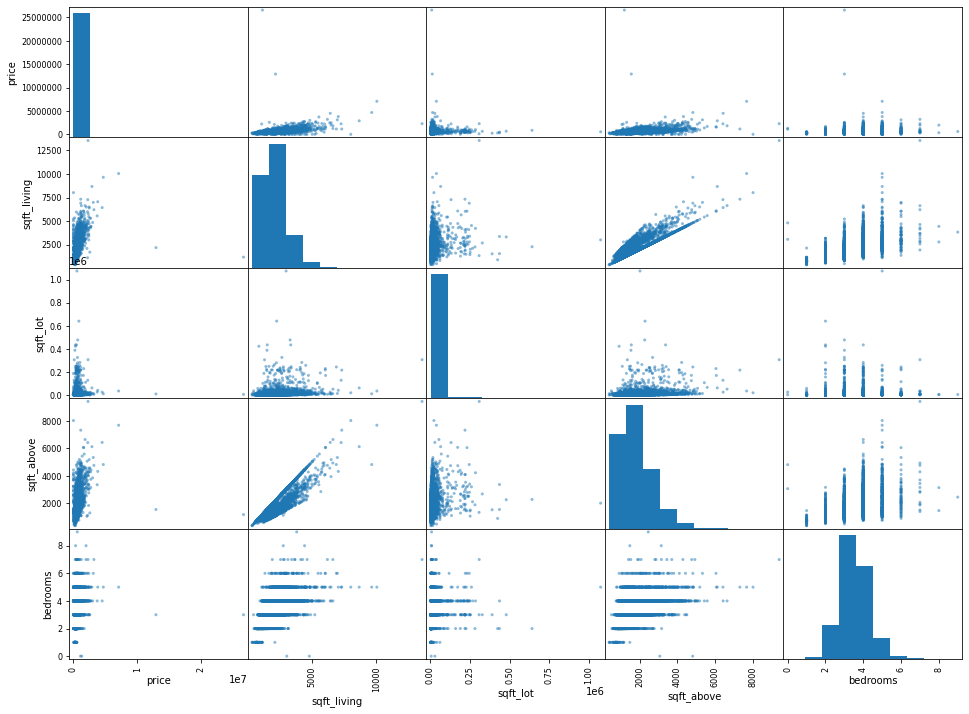

In [7]:

Attr = ["price", "sqft_living", "sqft_lot", "sqft_above", "bedrooms"]
pd.plotting.scatter_matrix(df[Attr], figsize=(16,12))

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:

cat_encoder = OneHotEncoder()


to_enc = ["country", "city"]

row_enc = cat_encoder.fit_transform(df[to_enc])
column_name = cat_encoder.get_feature_names_out(to_enc)
one_hot_encoded_frame =  pd.DataFrame(row_enc.todense(), columns= column_name)

one_hot_encoded_frame

,country_USA,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4596,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = df.join(one_hot_encoded_frame)
df = df.drop(df[to_enc], axis=1)
df = df.drop(["date", "statezip", "street", "sqft_basement"], axis=1)

In [11]:
df["price"].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [12]:
df["price"].sort_values(axis=0, ascending=False)

4350    26590000.0
4346    12899000.0
2286     7062500.0
2654     4668000.0
2761     4489000.0
           ...    
4472           0.0
4567           0.0
4354           0.0
4454           0.0
4382           0.0
Name: price, Length: 4600, dtype: float64

In [13]:
df = df.drop(df[(df.price == 0) | (df.price > 2000000)].index)

In [14]:
df["price"].sort_values(axis=0, ascending=False)

1301    2000000.0
839     2000000.0
3496    1990000.0
1500    1970000.0
1690    1965221.0
          ...    
4407      83300.0
4415      83300.0
1587      83000.0
1219      80000.0
4351       7800.0
Name: price, Length: 4504, dtype: float64

In [15]:
#df = df.drop(df[(df.sqft_lot < 0) | (df.sqft_lot > 30000)].index)

In [16]:
df["sqft_lot"].sort_values(axis=0, ascending=False)

1078    1074218
2480     641203
3487     478288
879      435600
375      435600
         ...   
3247        747
4004        746
1913        704
315         681
3608        638
Name: sqft_lot, Length: 4504, dtype: int64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_lot'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqf

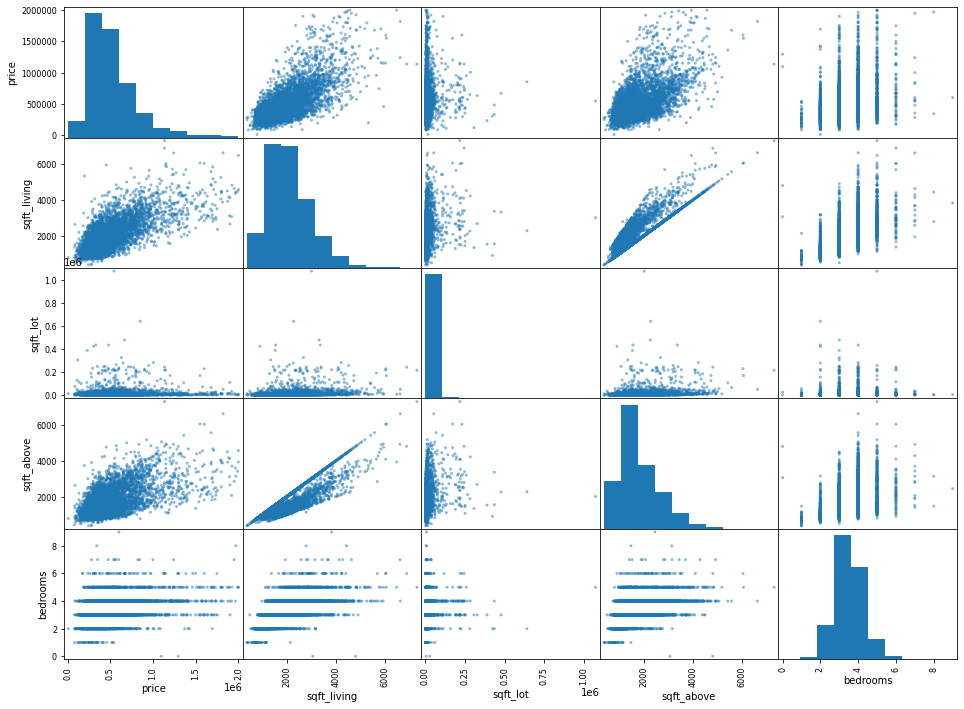

In [17]:
Attr = ["price", "sqft_living", "sqft_lot", "sqft_above", "bedrooms"]
pd.plotting.scatter_matrix(df[Attr], figsize=(16,12))

In [18]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#sns.heatmap(df.corr());

In [20]:
#plt.figure(figsize=(20,10)) 
#sns.heatmap(df.corr(), annot=True) 
#plt.show()

In [21]:
X = df.drop("price", axis="columns")
y = df["price"]

# Devide training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find correlation
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
sqft_living                 0.676772
sqft_above                  0.576759
bathrooms                   0.514726
view                        0.344831
bedrooms                    0.336355
floors                      0.283646
city_Mercer Island          0.235706
city_Bellevue               0.234506
city_Sammamish              0.112422
city_Redmond                0.106856
waterfront                  0.102411
city_Clyde Hill             0.090226
city_Medina                 0.089683
sqft_lot                    0.083629
city_Seattle                0.076846
city_Kirkland               0.070963
city_Yarrow Point           0.068511
condition                   0.058037
city_Woodinville            0.048083
city_Newcastle              0.040782
city_Issaquah               0.037989
yr_built                    0.033235
city_Fall City              0.028032
city_Beaux Arts Village     0.011131
city_Snoqualmie             0.010097
city_Preston                0.002476
c

In [22]:
# Gradient Boosting
gb_clf = ensemble.GradientBoostingRegressor(random_state=42)
gb_clf.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(gb_clf, X_train, y_train, scoring="r2", cv=5)
scores

array([0.64304776, 0.68846826, 0.67710737, 0.67278595, 0.73130382])

In [23]:


# Gradient Boosting
gb_clf = ensemble.GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5)
gb_clf.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(gb_clf, X_train, y_train, scoring="r2", cv=5)
scores

array([0.67656009, 0.72149108, 0.70669826, 0.72173824, 0.76328219])

In [24]:
def show_results(y_Test, Pred): 
    print('MAE on Test set :',metrics.mean_absolute_error(y_Test, Pred))
    print("\n")
    print('MSE on Test set :',metrics.mean_squared_error(y_Test, Pred))
    print("\n")
    print('RMSE on Test set :',np.sqrt(metrics.mean_absolute_error(y_Test, Pred)))
    print("\n")
    print('R2 Score on Test set :',metrics.r2_score(y_Test, Pred))
    print("\n")

In [25]:
 def show_scatterplot(y_Test, Pred):
        plt.figure(figsize=(10,10))
        plt.scatter(y_Test, Pred, c='crimson')
        plt.yscale('log')
        plt.xscale('log')

        p1 = max(max(Pred), max(y_Test))
        p2 = min(min(Pred), min(y_Test))
        plt.plot([p1, p2], [p1, p2], 'b-')
        plt.xlabel('True Values', fontsize=15)
        plt.ylabel('Predictions', fontsize=15)
        plt.axis('equal')
        plt.show()

In [26]:
#parameters = {
 #                 'learning_rate': [0.01,0.02,0.03,0.04],
  #                'subsample'    : [0.9, 0.5, 0.2, 0.1],
   #               'n_estimators' : [100,500,1000,1500],
    #              'max_depth'    : [4,6,8,10]
    #}

#gradient_grid = GridSearchCV(ensemble.GradientBoostingRegressor(), parameters ,scoring="r2", verbose = 3)
#gradient_grid.fit(X_train, y_train)
#print(gradient_grid.best_params_)
#print(gradient_grid.best_estimator_)

MAE on Test set : 93291.16945382251


MSE on Test set : 22142206669.23531


RMSE on Test set : 305.4360316888342


R2 Score on Test set : 0.6960445599385943




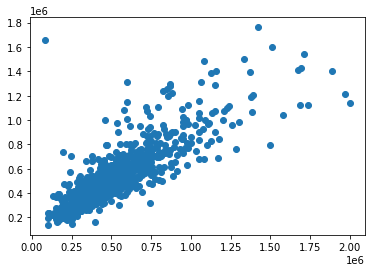

In [27]:
y_pred = gb_clf.predict(X_test)
show_results(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.show()

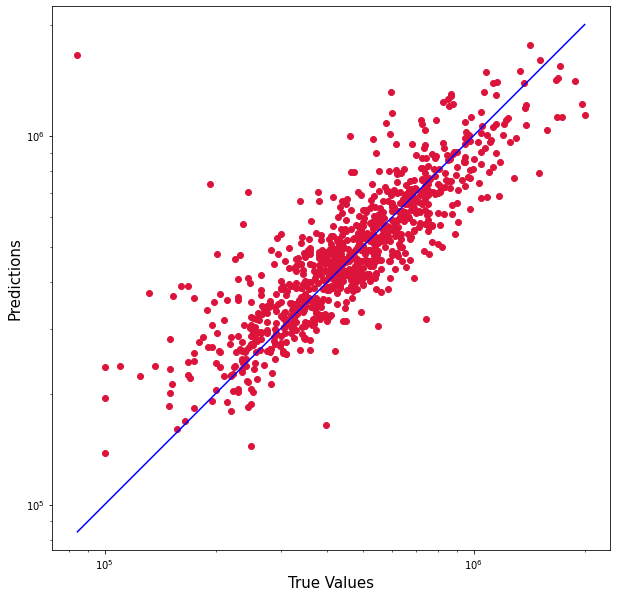

In [28]:
show_scatterplot(y_test, y_pred)

MAE on Test set : 419497607898229.2


MSE on Test set : 1.527397995890943e+32


RMSE on Test set : 20481640.752103556


R2 Score on Test set : -2.0967238583089881e+21




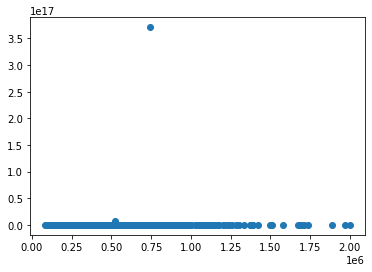

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
show_results(y_test, lr_y_pred)
plt.scatter(y_test, lr_y_pred)
plt.show()

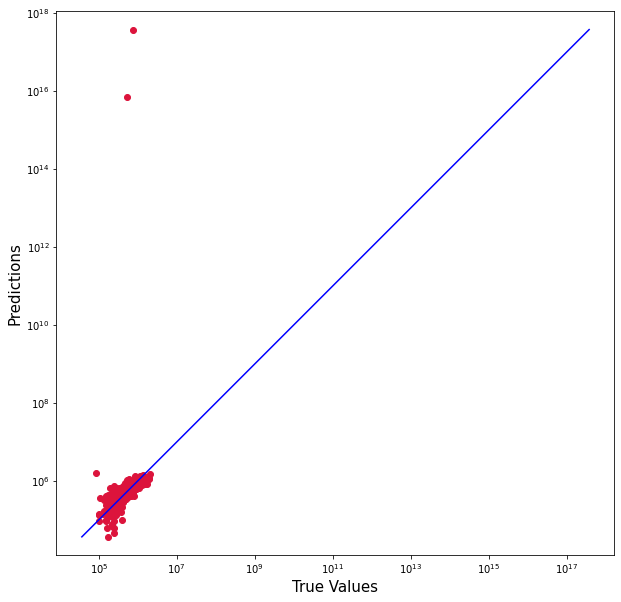

In [30]:
show_scatterplot(y_test, lr_y_pred)

In [31]:
# Random forest Boosting
rf_r = ensemble.RandomForestRegressor(random_state=42)
rf_r.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(rf_r, X_train, y_train, scoring="r2", cv=5)
scores

array([0.63600434, 0.7066927 , 0.67891547, 0.6758921 , 0.7280899 ])

MAE on Test set : 99048.73614019048


MSE on Test set : 24125420913.232376


RMSE on Test set : 314.72009173262273


R2 Score on Test set : 0.6688201388465571




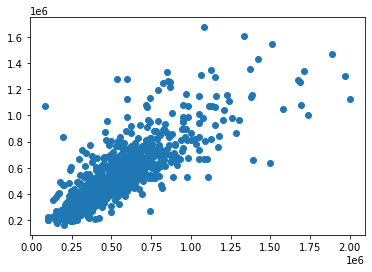

In [32]:
rf_y_pred = rf_r.predict(X_test)
show_results(y_test, rf_y_pred)
plt.scatter(y_test, rf_y_pred)
plt.show()

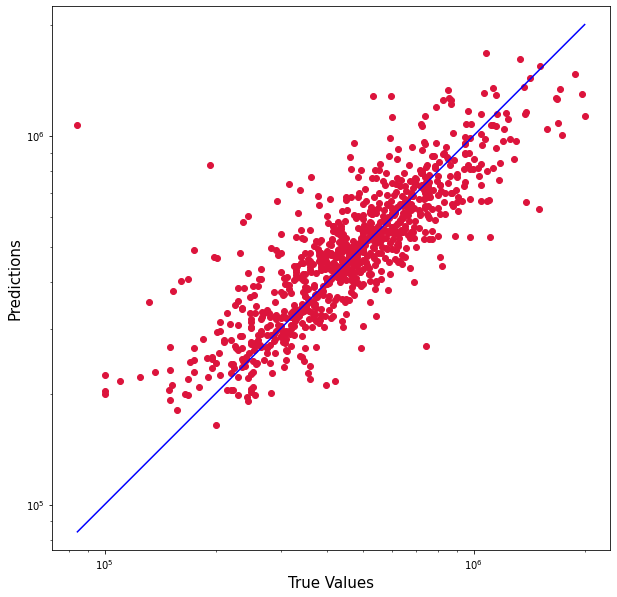

In [33]:
show_scatterplot(y_test, rf_y_pred)

In [34]:
Lasso
# Lasso regression
l = Lasso(random_state=42)
l.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(l, X_train, y_train, scoring="r2", cv=5)
scores

C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.867e+12, tolerance: 3.132e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.561e+12, tolerance: 2.538e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.352e+12, toleranc

array([0.64737144, 0.69712697, 0.67915147, 0.71046097, 0.73884395])

MAE on Test set : 99048.73614019048


MSE on Test set : 24125420913.232376


RMSE on Test set : 314.72009173262273


R2 Score on Test set : 0.6688201388465571




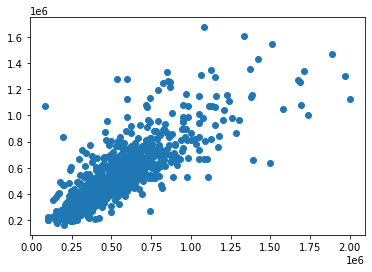

In [35]:
l_y_pred = rf_r.predict(X_test)
show_results(y_test, l_y_pred)
plt.scatter(y_test, l_y_pred)
plt.show()

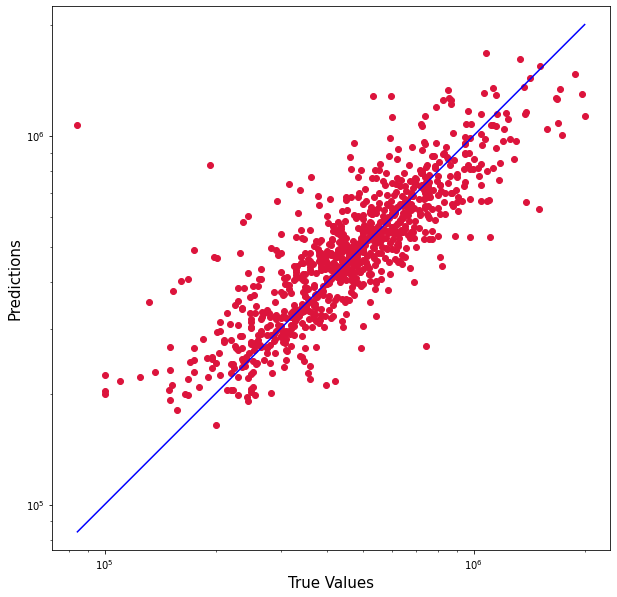

In [36]:
show_scatterplot(y_test, l_y_pred)

In [37]:
# Ridge regression
r = Ridge(random_state=42)
r.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(r, X_train, y_train, scoring="r2", cv=5)
scores

array([0.64740522, 0.69712284, 0.67932977, 0.71060275, 0.73890583])

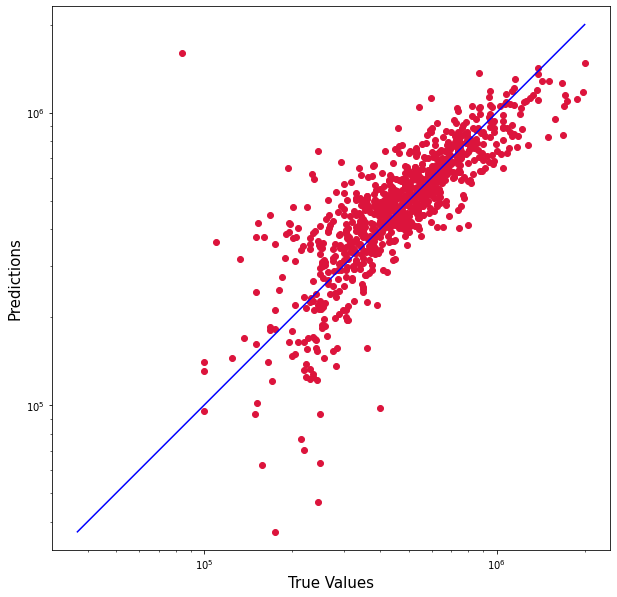

In [38]:
show_scatterplot(y_test, r.predict(X_test))

In [39]:

# SGD regression
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(sgd, X_train, y_train, scoring="r2", cv=5)
scores

array([ 0.41883445,  0.54109281, -0.69294274,  0.69865093,  0.31253221])

In [40]:
# ElasticNet regression
e = ElasticNet(random_state=42)
e.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(e, X_train, y_train, scoring="r2", cv=5)
scores

array([0.62699282, 0.65990924, 0.64882266, 0.67749321, 0.69462374])